In [1]:
import numpy as np
import matplotlib.pyplot as plt
from flow_decomposer import FlowDecomposition

In [15]:


#############################################
# New test example using mixed Lorenz systems #
#############################################

def simulate_lorenz(initial, sigma=10, rho=28, beta=8/3, dt=0.01, steps=1000):
    """
    Simulate a Lorenz attractor using Euler integration.
    Returns an array of shape (steps, 3).
    """
    trajectory = np.empty((steps, 3))
    trajectory[0] = initial
    for i in range(1, steps):
        x, y, z = trajectory[i-1]
        dx = sigma * (y - x)
        dy = x * (rho - z) - y
        dz = x * y - beta * z
        trajectory[i] = trajectory[i-1] + dt * np.array([dx, dy, dz])
    return trajectory

steps = 10000

# Simulate three independent Lorenz attractors.
traj1 = simulate_lorenz(initial=[1.0, 1.0, 1.0], steps=steps)
traj2 = simulate_lorenz(initial=[0.1, -1.0, 1.0], steps=steps)
traj3 = simulate_lorenz(initial=[0.5, 0.5, 0.0], steps=steps)

# Stack the three trajectories horizontally.
# This yields a latent data matrix of shape (steps, 9) [3 systems x 3 dimensions each].
X_latent = np.hstack([traj1, traj2, traj3])

M = np.random.randn(X_latent.shape[1], 20)  

# Mix the latent signals to generate the observed data.
X_mixed = X_latent @ M  # shape (steps, observed_dim)
X_mixed = (X_mixed - X_mixed.mean(axis=0))/X_mixed.std(axis=0)
# Initialization parameters for FlowDecomposition.
init_params = {
    "input_dim": 20, 
    "proj_dim": 2,
    "n_components": 3,        
    "num_delays": 0,
    "delay_step": 0,
    "subtract_autocorr": False,
    "device": "cuda",
    "optimizer": "Adagrad",
    "learning_rate": 0.01,
    "random_state": None
}

# Fit parameters.
fit_params = {
    "sample_size": 120,
    "library_size": 800,
    "exclusion_rad": 40,
    "theta": 3,
    "time_intv": 100,
    "num_epochs": 100,
    "num_rand_samples": 10,
    "batch_size": 5,
    "beta": 0,
    "pred_policy": "range",
    "mask_size": None
}

fd = FlowDecomposition(**init_params)
fd.fit(X_mixed, **fit_params)



Epoch 1/100, Loss: 0.9249, ccm_loss: 0.9249, h_norm_loss: 0.8461
Epoch 2/100, Loss: 0.8937, ccm_loss: 0.8937, h_norm_loss: 0.8474
Epoch 3/100, Loss: 0.8915, ccm_loss: 0.8915, h_norm_loss: 0.8489
Epoch 4/100, Loss: 0.8639, ccm_loss: 0.8639, h_norm_loss: 0.8477
Epoch 5/100, Loss: 0.8418, ccm_loss: 0.8418, h_norm_loss: 0.8481
Epoch 6/100, Loss: 0.8227, ccm_loss: 0.8227, h_norm_loss: 0.8479
Epoch 7/100, Loss: 0.7957, ccm_loss: 0.7957, h_norm_loss: 0.8469
Epoch 8/100, Loss: 0.7774, ccm_loss: 0.7774, h_norm_loss: 0.8449
Epoch 9/100, Loss: 0.7916, ccm_loss: 0.7916, h_norm_loss: 0.8422
Epoch 10/100, Loss: 0.7661, ccm_loss: 0.7661, h_norm_loss: 0.8404
Epoch 11/100, Loss: 0.7703, ccm_loss: 0.7703, h_norm_loss: 0.8398
Epoch 12/100, Loss: 0.7634, ccm_loss: 0.7634, h_norm_loss: 0.8379
Epoch 13/100, Loss: 0.7273, ccm_loss: 0.7273, h_norm_loss: 0.8374
Epoch 14/100, Loss: 0.7264, ccm_loss: 0.7264, h_norm_loss: 0.8346
Epoch 15/100, Loss: 0.7065, ccm_loss: 0.7065, h_norm_loss: 0.8325
Epoch 16/100, Loss:

In [16]:
unmixed = fd.predict(X_mixed)

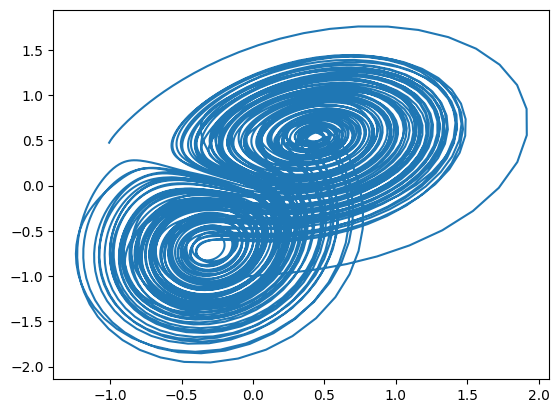

In [17]:
plt.plot(unmixed[:,0,0],unmixed[:,0,1])

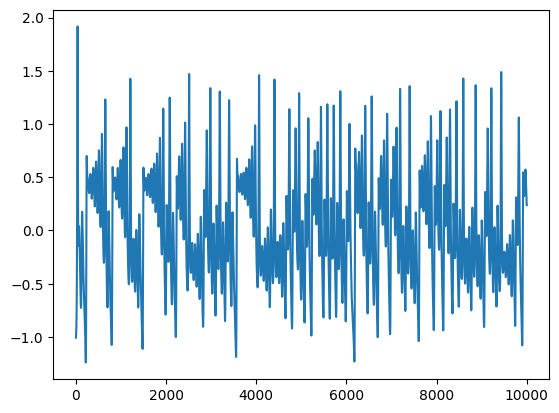

In [18]:
plt.plot(unmixed[:,0,0])